In [10]:
from json import dumps
from time import sleep
from kafka import KafkaProducer
from kafka import KafkaConsumer
from json import loads

In [11]:
import random
from os import getpid
from datetime import datetime
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from datetime import date, datetime

In [12]:
producer = KafkaProducer(bootstrap_servers=['localhost:9092'],
                         value_serializer=lambda x: 
                         dumps(x).encode('utf-8'))

In [13]:
width = random.choice([16, 32])

In [14]:
def gen_image():
    imarray = (np.random.rand(width, width, 3) * 255).astype(np.uint8)
    return imarray

In [15]:
def show_image(imarr):
    plt.imshow(imarr)
    plt.show

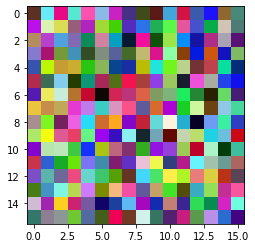

In [16]:
show_image(gen_image())

In [17]:
def json_serial(obj):
    """JSON serializer for objects not serializable by default json code"""

    if isinstance(obj, (datetime, date)):
        return obj.isoformat()
    raise TypeError ("Type %s not serializable" % type(obj))

In [18]:
for e in range(200):
    data = {'id' : getpid(), 'date': dumps(datetime.now(), default=json_serial), 'data': dumps(gen_image().tolist())}
    producer.send('my-topic', value=data)